<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0113_%EA%B0%95%EC%9D%98%EC%A7%84%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

복습
===

### (1) 결측치 처리하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
titanic = pd.read_csv("/content/drive/MyDrive/새싹2기/데이터분석/data/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### step1 : 결측치 확인하기

In [ ]:
# 각 셀값이 결측치인지 아닌지 확인하는 메서드
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
type(titanic.isnull())

pandas.core.frame.DataFrame

In [ ]:
# 행 방향 합산 (위에서부터 아래로)
# => 열별 합산

ms = titanic.isnull().sum() # 열별 결측 발생 갯수를 알 수 있다.
type(ms)

pandas.core.series.Series

In [ ]:
# 조건 : 열별 결측치 합산한 값이 0보다 큰 경우만, (ms > 0)
# 필터링 : ms 를 보여줘라

ms[ms > 0]

,0
age,177
embarked,2
deck,688
embark_town,2


<Axes: >

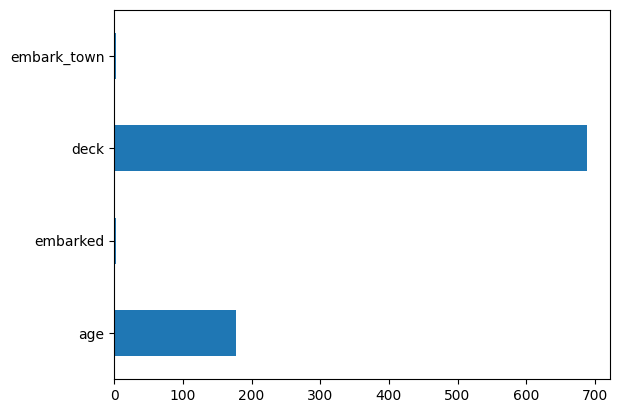

In [ ]:
# 결측이 발생한 열이 얼마나 많이 발생했는지,
# "비교"를 위한 막대 그래프 시각화
ms[ms > 0].plot.barh()

#### step2 : 결측치 처리전략 선택

1. 삭제 : 결측치 발생 -> 전체 행 삭제 / 전체 열 삭제 / 부분 삭제
2. 대체 : 결측치 발생 -> 채워 넣기 (평균, 중앙값, 최빈값, 고정된 값, 도메인 등의 논리로 채워 넣는 방법 등)
3. 유지 : 그냥 둔다.

In [ ]:
ms_cols = list(ms[ms > 0].index)
ms_cols

['age', 'embarked', 'deck', 'embark_town']

In [ ]:
titanic[ms_cols].dtypes

,0
age,float64
embarked,object
deck,object
embark_town,object


In [ ]:
# 수치형 컬럼들의 기술통계량 확인
titanic[ms_cols].describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
titanic[ms_cols].isnull().sum()

,0
age,177
embarked,2
deck,688
embark_town,2


In [ ]:
177 / 891

0.19865319865319866

<Axes: ylabel='Frequency'>

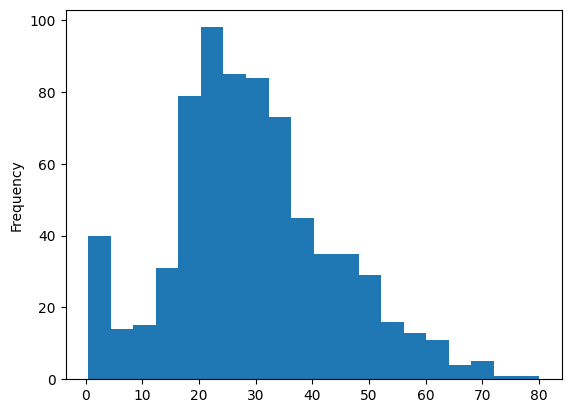

In [ ]:
# 자세히 확인
# 목적: 단일 변수의 "분포" 확인
# 히스토그램으로 확인하기
titanic['age'].plot(kind='hist',bins=20)

> 판단 방향

- 판단 1. 약 20%의 결측을 대표값(중앙값)으로 대체 ✅
- 판단 2. 혹은 결측 자체에서 의미를 가지고 있지 않을까? => 판단 추가 필요

In [ ]:
# 범주형 컬럼들의 기술통계량 확인
titanic[ms_cols].describe(include='object')

,embarked,deck,embark_town
count,889,203,889
unique,3,7,3
top,S,C,Southampton
freq,644,59,644


> 판단 방향
- 판단1. 644건이나 최빈 값이 발생한 `embarked` , `embark_town`은 최빈값으로 대체해도 되겠다.
- 판단2. 2건 밖에 발생하지 않은 `embarked`, `embark_town`은 해당 컬럼에서 결측치가 발생한 행 자체를 없애버려도 영향이 적겠다. ✅

In [ ]:
644 / 891

0.7227833894500562

> 판단 방향
- 판단 1. `deck` 는 가장 많이 발생한 최빈값의 빈도가 59번 밖에 안된다. => 전체를 대표할 수 있는가?
- 판단 2. `deck` 라는 열을 삭제하기
- 판단 3. `deck`의 결측치임을 나타내는 고정 값 처리

In [ ]:
59 / 891

0.06621773288439955

#### step3 : 결측치 처리

embarked, embark_town -> 해당 컬럼에서 결측치가 발생한 "행 자체 삭제"

In [ ]:
titanic.dropna(subset=['embarked','embark_town'],inplace=True)

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
titanic.shape

(889, 15)

> deck 처리 전략 방향
1. 열 삭제
2. unknown 이라는 값 대체 ✅

In [ ]:
688 / 889

0.7739032620922385

In [ ]:
titanic['deck'].value_counts(dropna=False)

,count
deck,
NaN,688
C,59
B,45
D,33
E,32
A,15
F,13
G,4


In [ ]:
# 다양한 방식을 보여주고 싶어, 대체

titanic_cleaned = titanic.fillna({'deck':'Unknown',
                                 'age':titanic['age'].median()})
titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True


#### step4 : 검증

In [ ]:
titanic_cleaned.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
titanic_cleaned[ms_cols].describe()

,age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


<Axes: ylabel='Frequency'>

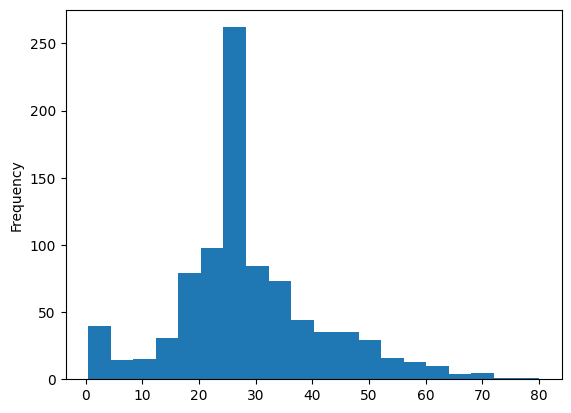

In [ ]:
# 기존보다 분포가 많이 바뀌었는지
titanic_cleaned['age'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

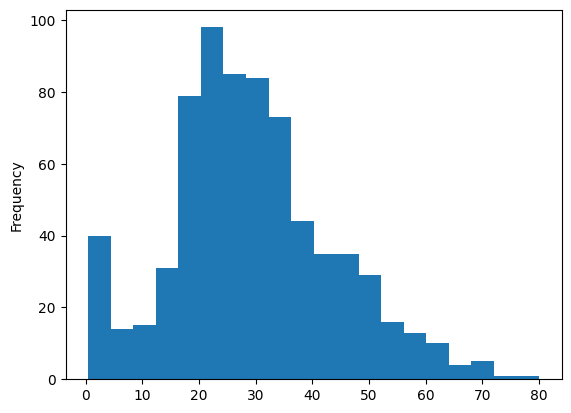

In [ ]:
titanic['age'].plot.hist(bins=20)


데이터 전처리
===

## [1] 이상치 처리

이상치 -> 수치형 자료인 컬럼

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# (참고) 특정 데이터 타입을 가지는 열만을 선택해서 보기 위한 메서드

titanic.select_dtypes(exclude='object')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,3,35.0,0,0,8.0500,True,True
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True
887,1,1,19.0,0,0,30.0000,False,True
888,0,3,NaN,1,2,23.4500,False,False
889,1,1,26.0,0,0,30.0000,True,True


> 대소비교 불가능한 컬럼 제외 필요
1. bool 형식 (True/False) -> `adult_male`, `alone`
2. `survived` 컬럼 -> 생존(1) / 사망(0) 단순 표현 -> 구분
3. `pclass` 컬럼 -> First(1), Second(2), Third(3) -> 1보다 3이 큰가?

#### step1 : 이상치 확인

In [ ]:
ol_cols = ['age','sibsp','parch','fare']
ol_cols

['age', 'sibsp', 'parch', 'fare']

<Axes: >

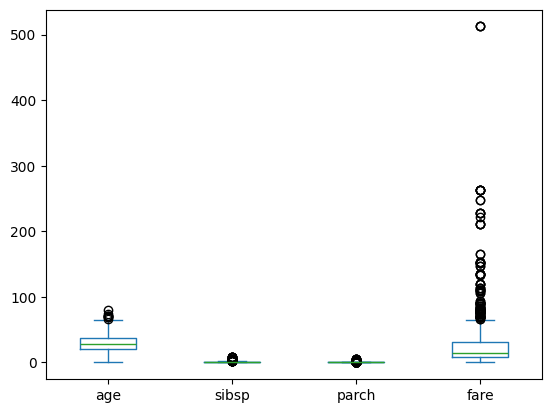

In [ ]:
titanic[ol_cols].plot.box()

# 단위가 맞지 않아서, 따로 봐야 함

<Axes: >

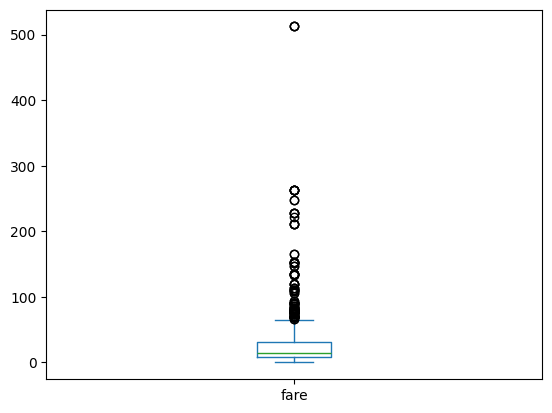

In [ ]:
titanic['fare'].plot.box()

In [ ]:
titanic['fare'].describe()
# 평균과 중앙값의 차이가 많이난다.
# 이상치가 존재

,fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


<Axes: >

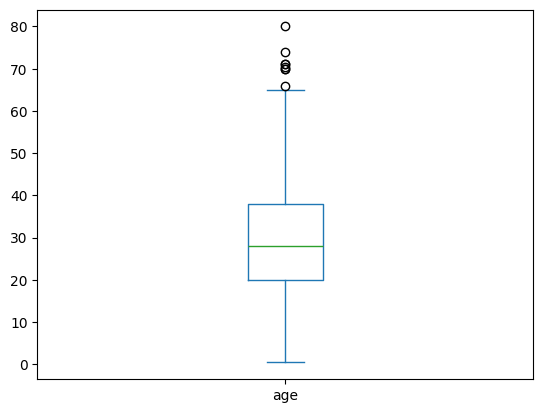

In [ ]:
titanic['age'].plot.box()

In [ ]:
titanic['age'].describe()

,age
count,712.000000
mean,29.642093
std,14.492933
min,0.420000
25%,20.000000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: >

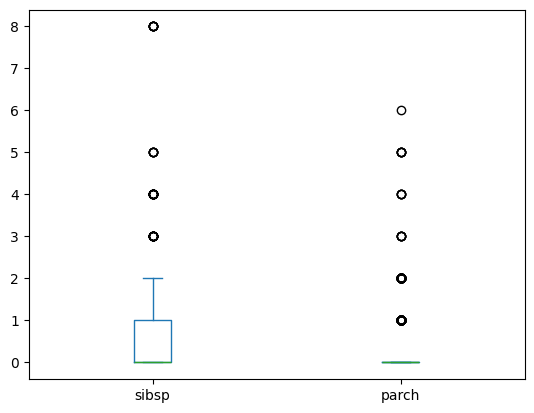

In [ ]:
# 이산형 데이터
titanic[['sibsp','parch']].plot.box()

In [ ]:
titanic['sibsp'].value_counts()

,count
sibsp,
0,606
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
titanic['parch'].value_counts()

,count
parch,
0,676
1,118
2,80
5,5
3,5
4,4
6,1


#### step2 : 이상치 평가

In [ ]:
ol_cols

['age', 'sibsp', 'parch', 'fare']

> 이상치 평가
- `sibsp`, `parch` : 이산형, 충분히 있을 수 있는 케이스
    - 형제자매,배우자의 수 8명 이상 대가족이 발생할 수 없는 케이스인가? -> ❌
    - 부모,자식의 수가 5~6명 발생할 수 없는 케이스인가? -> ❌
- `age` : 연속형, 충분히 있을 수 있는 케이스
    - 나이 80살 이상이 논리적으로 발생할 수 없는가 -> ❌

세 컬럼의 이상치는 없다고 평가하고, 처리하지 않겠다.

> 이상치 평가 결과,
- `fare` 에 대한 이상치 처리 필요

#### step3 : 이상치 처리전략 선택

1. 삭제 : drop 메서드
2. <s>대체</s> : 선택 + 할당
3. 유지 : 그냥 둔다

삭제 혹은 유지를 선택

#### step4: 이상치 처리

> (선택) 시각화한 내용으로 500 이상만 처리

In [ ]:
# 확인
titanic[titanic['fare'] >= 500]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [ ]:
# 행이름 받기

fare_ol_idx = titanic[titanic['fare'] >= 500].index
fare_ol_idx

Index([258, 679, 737], dtype='int64')

In [ ]:
# 행 이름에 해당하는 행 삭제
titanic_oulier_clean = titanic.drop(index=fare_ol_idx)

> (예시) IQR 방식

In [ ]:
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [ ]:
lower, upper

(np.float64(-26.7605), np.float64(65.6563))

In [ ]:
fare_ol_idx = titanic[(titanic['fare'] < lower) | (titanic['fare'] > upper)].index

titanic.drop(index=fare_ol_idx)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### step5: 이상치 검증

<Axes: >

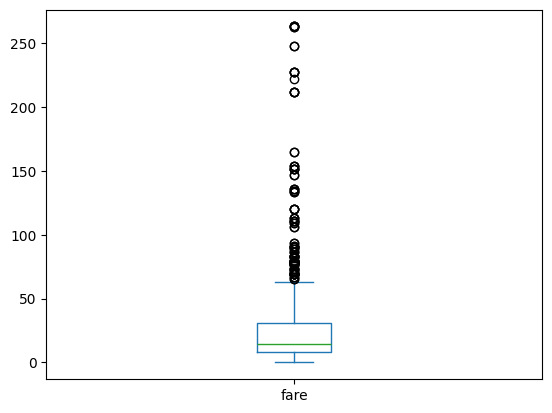

In [ ]:
titanic_oulier_clean['fare'].plot.box()

# 이상치는 상대적이기 때문에 적당히 확인

## [2] 문자열 처리

In [ ]:
# 예제 데이터 프레임 생성
import pandas as pd

data = {
    'Names': ['John Doe  ', '  Jane Smith', 'Alice Johnson  ', 'Chris Lee'],
    'Email': ['JOHNDOE@example.com', 'janesmith@example.com', 'AliceJ@example.com', 'ChrisL@example.net']
}
df = pd.DataFrame(data)

In [ ]:
df

,Names,Email
0,John Doe,JOHNDOE@example.com
1,Jane Smith,janesmith@example.com
2,Alice Johnson,AliceJ@example.com
3,Chris Lee,ChrisL@example.net


In [ ]:
df.dtypes

,0
Names,object
Email,object


### (1) 문자열 정리


`df['col'].str.메서드()` 의 형태를 따른다!

1. df의 col 컬럼의 문자열을 하나하나 받아서
2. 메서드를 이용하여 변환 후
3. 새로운 시리즈를 반환한다.

In [ ]:
# 처리를 마친 새로운 시리즈를 반환

# 소문자 변환
df['Names'].str.lower()

,Names
0,john doe
1,jane smith
2,alice johnson
3,chris lee


In [ ]:
df['Email'] = df['Email'].str.lower()

In [ ]:
# 대문자 변환
df['Names'].str.upper()

,Names
0,JOHN DOE
1,JANE SMITH
2,ALICE JOHNSON
3,CHRIS LEE


In [ ]:
# 앞에 공백이 존재하기 때문에, jane smith라고 나옴
df['Names'].str.capitalize()

,Names
0,John doe
1,jane smith
2,Alice johnson
3,Chris lee


In [ ]:
# 공백 제거
df['Names'] = df['Names'].str.strip()

In [ ]:
df['Names'].str.capitalize()

,Names
0,John doe
1,Jane smith
2,Alice johnson
3,Chris lee


In [ ]:
# 포함여부
# 필터링과 함께 쓰임
df['Email'].str.contains('example.com')

,Email
0,True
1,True
2,True
3,False


In [ ]:
# True / False의 시리즈를 바탕으로, True인 행만 선택하여 확인
df[df['Email'].str.contains('example.com')]

,Names,Email
0,John Doe,johndoe@example.com
1,Jane Smith,janesmith@example.com
2,Alice Johnson,alicej@example.com


In [ ]:
# 문자열 치환

df['Email'].str.replace('com','co.kr')

,Email
0,johndoe@example.co.kr
1,janesmith@example.co.kr
2,alicej@example.co.kr
3,chrisl@example.net


In [ ]:
# (참고) 아래 함수로 값변환은 작동하지 않는다/
df['Email'].map({'com':'co.kr'})

,Email
0,NaN
1,NaN
2,NaN
3,NaN


In [ ]:
# 문자열 분할
df['Email'].str.split('@')

'johndoe'

In [ ]:
# 보편적인 사용법

# 특정 구분자를 통해 분할한 후, 데이터 프레임의 새로운 열로 할당한다.
df[['user_id','domain']] = df['Email'].str.split('@',expand=True)

# 언제? 데이터 전처리 후, 파생컬럼 생성시 자주 사용

In [ ]:
df

,Names,Email,user_id,domain
0,John Doe,johndoe@example.com,johndoe,example.com
1,Jane Smith,janesmith@example.com,janesmith,example.com
2,Alice Johnson,alicej@example.com,alicej,example.com
3,Chris Lee,chrisl@example.net,chrisl,example.net


### (2) 범주형 데이터

- 문자열 : 일반적인 텍스트
- 범주형 : 고정된 범위가 존재하는 카테고리

In [ ]:
data = {
    'CustomerID': range(10),
    'Rating':[4,5,3,2,4,1,4,5,3,4],
    'Satisfaction': ['Satisfied', 'Very Satisfied', 'Neutral', 'Unsatisfied', 'Satisfied',
                     'Very Unsatisfied','Satisfied', 'Very Satisfied', 'Neutral','Satisfied']
}
df = pd.DataFrame(data)

In [ ]:
df.dtypes

,0
CustomerID,int64
Rating,int64
Satisfaction,object


`pd.Categorical`을 통해 제작

In [ ]:
df['Sat_cat'] = pd.Categorical(df['Satisfaction'],
                                categories=['Very Unsatisfied','Unsatisfied',
                                            'Neutral','Satisfied','Very Satisfied'],
                                # 카테고리 명시

                                ordered=True)
                                # 순서 추가

In [ ]:
df.dtypes

,0
CustomerID,int64
Rating,int64
Satisfaction,object
Sat_cat,category


In [ ]:
df['Sat_cat'].value_counts(sort=False)

,count
Sat_cat,
Very Unsatisfied,1
Unsatisfied,1
Neutral,2
Satisfied,4
Very Satisfied,2


<Axes: xlabel='Sat_cat'>

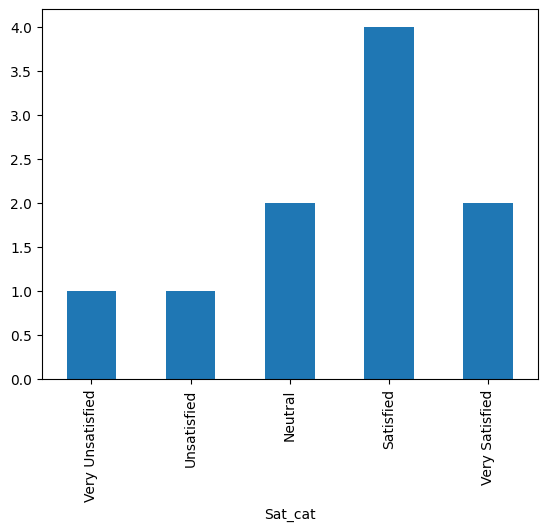

In [ ]:
df['Sat_cat'].value_counts(sort=False).plot.bar()

In [ ]:
# 카테고리에 정의되어 있는 녀석만 들어올 수 있다.
df.loc[4,'Sat_cat'] = '만족'

TypeError: Cannot setitem on a Categorical with a new category (만족), set the categories first

In [ ]:
df['Sat_cat']

,Sat_cat
0,Satisfied
1,Very Satisfied
2,Neutral
3,Unsatisfied
4,Satisfied
5,Very Unsatisfied
6,Satisfied
7,Very Satisfied
8,Neutral
9,Satisfied


In [ ]:
print(df['Sat_cat'])

0           Satisfied
1      Very Satisfied
2             Neutral
3         Unsatisfied
4           Satisfied
5    Very Unsatisfied
6           Satisfied
7      Very Satisfied
8             Neutral
9           Satisfied
Name: Sat_cat, dtype: category
Categories (5, object): ['Very Unsatisfied' < 'Unsatisfied' < 'Neutral' < 'Satisfied' < 'Very Satisfied']


> 특징
1. 카테고리가 기정의 되어있는 값들만 들어올 수 있고,
2. pd.Categorical로 범주형 변수로 만들 때, 카테고리 외의 값은 아예 결측 처리
=> 사용자 수정 단에서 경고를 줄 수 있다.

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.select_dtypes(include='object')

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,NaN,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,NaN,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,NaN,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,NaN,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,NaN,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [ ]:
# 1. 문자열 정리
titanic['sex'] = titanic['sex'].str.replace('female','F')
titanic['sex'] = titanic['sex'].str.replace('male','M')

In [ ]:
# 2. 범주형 데이터화 - 순서가 존재하는 범주형
titanic['sex_cat'] = pd.Categorical(titanic['sex'])

In [ ]:
titanic['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [ ]:
titanic['class_cat'] = pd.Categorical(titanic['class'],
                                        categories = ['First', 'Second', 'Third'][::-1],
                                        # categories = ['Third', 'Second', 'First'] 와 같다.
                                        ordered=True)

<Axes: ylabel='class_cat'>

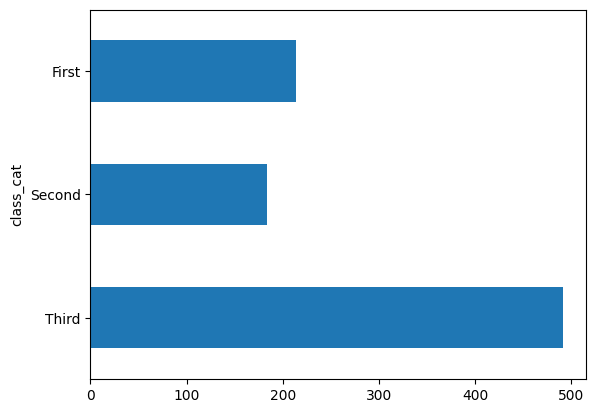

In [ ]:
titanic['class_cat'].value_counts(sort=False).plot.barh()

<Axes: ylabel='count'>

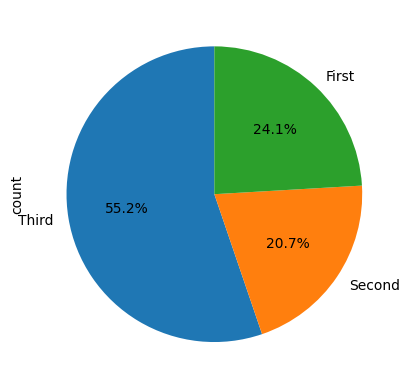

In [ ]:
titanic['class_cat'].value_counts(sort=False).plot.pie(startangle=90, autopct='%1.1f%%')

In [ ]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_cat,class_cat
0,0,3,M,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,M,Third
1,1,1,F,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,F,First


In [ ]:
# titanic.loc[1,'class_cat'] = '프레스티지'

TypeError: Cannot setitem on a Categorical with a new category (프레스티지), set the categories first

기정의 되지 않은 값이 들어오려고 하면 에러를 발생시킨다.

[공식문서 참고](https://pandas.pydata.org/docs/reference/api/pandas.CategoricalIndex.add_categories.html#pandas.CategoricalIndex.add_categories)

In [ ]:
# 새로운 카테고리 추가 후에 값을 넣을 수 있다.
titanic['class_cat'] = titanic['class_cat'].cat.add_categories('프레스티지')

In [ ]:
print(titanic['class_cat'])

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class_cat, Length: 889, dtype: category
Categories (4, object): ['Third' < 'Second' < 'First' < '프레스티지']


데이터 분석을 위한 데이터 구조화
===

## [1] 데이터 요약하기

In [207]:
import pandas as pd

# 예제 데이터 생성
data = {'Name': ['John', 'Anna', 'Peter', 'Linda', 'James'],
        'Department': ['Sales', 'Marketing', 'Sales', 'HR', 'HR'],
        'Salary': [70000, 80000, 120000, 90000, 85000]}

df = pd.DataFrame(data)

In [208]:
df

,Name,Department,Salary
0,John,Sales,70000
1,Anna,Marketing,80000
2,Peter,Sales,120000
3,Linda,HR,90000
4,James,HR,85000


### (1) Groupby 기본 사용법

In [210]:
# step1 : 그룹화

grouped = df.groupby('Department')

# step 2 : 함수 적용
grouped.mean(numeric_only=True)

,Salary
Department,
HR,87500.0
Marketing,80000.0
Sales,95000.0


In [211]:
titanic.groupby('sex')['age'].mean()

,age
sex,
F,27.745174
M,30.726645


In [212]:
titanic.loc[titanic['sex'] == 'F','age'].mean()

np.float64(27.745173745173744)

In [213]:
titanic.loc[titanic['sex'] == 'M','age'].mean()

np.float64(30.72664459161148)

In [214]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_cat,class_cat
0,0,3,M,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,M,Third
1,1,1,F,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,F,First


In [216]:
titanic['deck'].value_counts()

,count
deck,
C,59
B,45
D,33
E,32
A,15
F,13
G,4


In [217]:
# 여섯번의 필터링과 계산결과를 한 줄로 요약 가능
titanic.groupby('deck')['fare'].mean()

,fare
deck,
A,39.623887
B,114.994909
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250


### (2) Groupby 응용 - agg

In [219]:
# 단일 열 확인
titanic.groupby('sex')['fare'].agg(['min','max','mean','std'])

,min,max,mean,std
sex,,,,
F,6.75,512.3292,44.252124,58.113672
M,0.00,512.3292,25.523893,43.138263


In [222]:
# 여러 열에 서로 다른 집계 함수 적용

titanic_class_gb = titanic.groupby('class').agg({'fare':'mean',
                                                'age':'max',
                                                'survived':'mean'})
titanic_class_gb

,fare,age,survived
class,,,
First,84.193516,80.0,0.626168
Second,20.662183,70.0,0.472826
Third,13.675550,74.0,0.242363


In [223]:
titanic_class_gb.index # 행의 이름이 숫자가 아니라, 기준별 값

Index(['First', 'Second', 'Third'], dtype='object', name='class')

In [224]:
titanic_class_gb.columns

Index(['fare', 'age', 'survived'], dtype='object')

In [225]:
# 행의 이름을 열로 되돌린다
titanic_class_gb.reset_index()

,class,fare,age,survived
0,First,84.193516,80.0,0.626168
1,Second,20.662183,70.0,0.472826
2,Third,13.675550,74.0,0.242363


> 여러 기준으로 그룹핑 가능?

In [227]:
# 생존 변수가 성별, 등급별로 어떤 차이가 있었느냐? -> 요약/비교
titanic.groupby(['sex','class'])['survived'].mean().reset_index()

,sex,class,survived
0,F,First,0.967391
1,F,Second,0.921053
2,F,Third,0.500000
3,M,First,0.368852
4,M,Second,0.157407
5,M,Third,0.135447
